# Problem Statement 
* The goal of this project is to leverage machine learning to develop a machine learning model that can predict the price of gold based on various features and factors.
* This falls under the category of time series forecasting. However, we will drop Date column and will not perform timeseries forecasting as of now. We will use Regression machine learning techniques.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
gold_price_df = pd.read_csv('/kaggle/input/gold-price-data/Day8_Gold_Price_Data.csv') 
gold_price_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
print('The size of Dataframe is: ', gold_price_df.shape)
print('The Column Name, Record Count and Data Types are as follows: ')
gold_price_df.info()

The size of Dataframe is:  (2290, 6)
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in gold_price_df.columns if gold_price_df[feature].dtype != 'O']
categorical_features = [feature for feature in gold_price_df.columns if gold_price_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

We have 1 categorical features : ['Date']


In [5]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
total=gold_price_df.isnull().sum().sort_values(ascending=False)
percent=(gold_price_df.isnull().sum()/gold_price_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 


,Total,Percent
Date,0,0.0
SPX,0,0.0
GLD,0,0.0
USO,0,0.0
SLV,0,0.0
EUR/USD,0,0.0


In [6]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
gold_price_df.describe()

Summary Statistics of numerical features for DataFrame are as follows:


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_price_df = gold_price_df.drop(['Date'], axis=1)
gold_price_df

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
correlation = gold_price_df.corr()
correlation


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

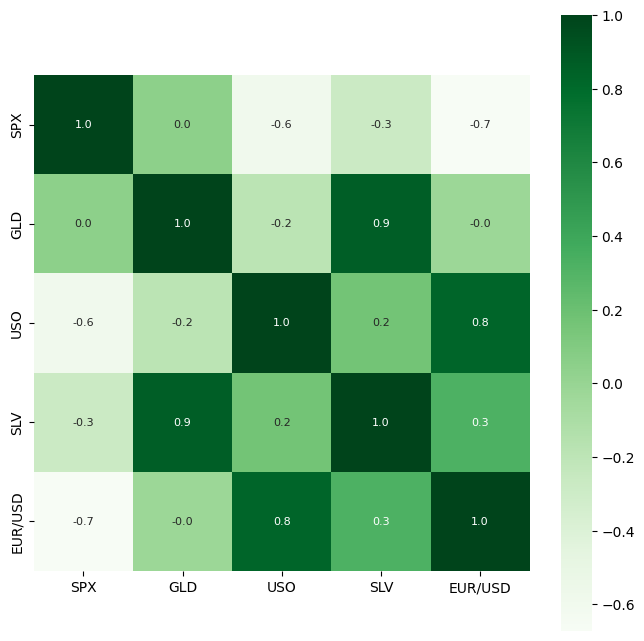

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [10]:
#Model Building
# separating the data and labels
X = gold_price_df.drop(columns = ['GLD'], axis=1) # Feature matrix
y = gold_price_df['GLD'] # Target variable


In [11]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [12]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [14]:
standardized_data = scaler.transform(X)
standardized_data

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]])

In [15]:
X=standardized_data
X

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]])

In [16]:
#Train-Test Split
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [17]:
print(X.shape, X_train.shape, X_test.shape)


(2290, 4) (1832, 4) (458, 4)


In [18]:
print(y.shape, y_train.shape, y_test.shape)


(2290,) (1832,) (458,)


In [19]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [20]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,6.119079,69.199813,8.318642,0.871706
Lasso,6.397819,72.040885,8.487690,0.866439
Ridge,6.121224,69.186689,8.317854,0.871731
SVR,3.339882,30.362571,5.510224,0.943709
Decision Tree Regressor,1.693376,13.151409,3.626487,0.975618
Random Forest Regressor,1.294149,5.565100,2.359046,0.989683


# Inference
In the context of predicting gold prices ;

* The Support Vector Regressor (SVR) and Random Forest Regressor stand out as the top models for gold price prediction showcasing low prediction errors (MAE, MSE, RMSE) and a high degree of explained variance (R-squared).
* The Decision Tree Regressor also performs well but falls slightly behind.
* Conversely, Linear Regression, Lasso, and Ridge models display comparatively higher errors and less variance explanation, making them less suitable for accurate gold price forecasting. Therefore, SVR and Random Forest Regressor are preferred choices for robust gold price prediction.